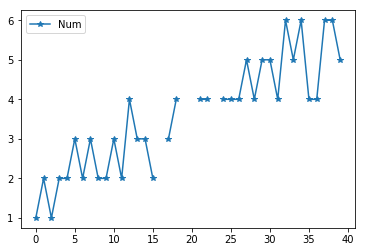

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df_log = pd.read_table('data/product_log.tsv')
# グラフで確認（変更前のグラフは青色の線で描画）
df_log.plot(marker='*');

In [2]:
# fillna(0) で欠損値を0に置き換え
df_log['Num_fill_0'] = df_log.Num.fillna(0)
df_log[16:24]

,Date,Num,Product,Num_fill_0
16,2017-02-08,NaN,A,0.0
17,2017-02-12,3.0,B,3.0
18,2017-02-14,4.0,A,4.0
19,2017-02-16,NaN,A,0.0
20,2017-02-18,NaN,A,0.0
21,2017-02-20,4.0,B,4.0
22,2017-02-23,4.0,A,4.0
23,2017-02-24,NaN,A,0.0


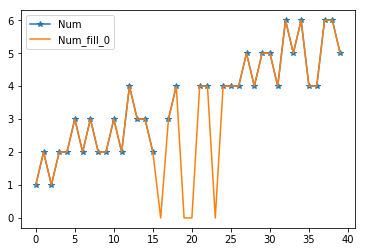

In [3]:
df_log.Num.plot(marker='*')
df_log.Num_fill_0.plot()  # オレンジの線
plt.legend();

In [4]:
df_log.fillna(0)
print('欠損値の数 =', df_log.Num.isnull().sum())  # 欠損値が4つ残っています

# inplace=True をつけると元のDataFrameは変更します
df_log_copy = df_log.copy()  # 別のDataFrameに複製
df_log_copy.fillna(0, inplace=True)
print('欠損値の数 =', df_log_copy.Num.isnull().sum())  # 欠損値はありません

欠損値の数 = 4
欠損値の数 = 0


In [5]:
### 欠損値を平均に変換

In [6]:
# Numの平均
df_log.Num.mean()

3.5833333333333335

In [7]:
# 欠損値をNum列の平均で置き換え
df_log['Num_fill_mean'] = df_log.Num.fillna(df_log.Num.mean())
df_log[16:24]

,Date,Num,Product,Num_fill_0,Num_fill_mean
16,2017-02-08,NaN,A,0.0,3.583333
17,2017-02-12,3.0,B,3.0,3.000000
18,2017-02-14,4.0,A,4.0,4.000000
19,2017-02-16,NaN,A,0.0,3.583333
20,2017-02-18,NaN,A,0.0,3.583333
21,2017-02-20,4.0,B,4.0,4.000000
22,2017-02-23,4.0,A,4.0,4.000000
23,2017-02-24,NaN,A,0.0,3.583333


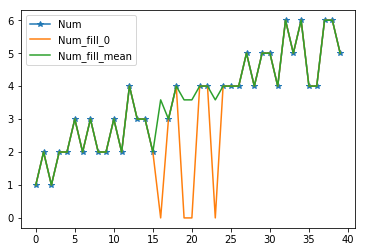

In [8]:
df_log.Num.plot(marker='*')  # 青色の線は上書きされて見えません
df_log.Num_fill_0.plot()
df_log.Num_fill_mean.plot()
plt.legend();

In [9]:
# 列ラベルをキーとした平均値の辞書
df_log.mean().to_dict()

{'Num': 3.5833333333333335,
 'Num_fill_0': 3.225,
 'Num_fill_mean': 3.5833333333333335}

In [10]:
# 欠損値を各列の平均で置き換えます
df_log_fillna = df_log.fillna(df_log.mean().to_dict())
df_log_fillna.iloc[16:24, :3]

,Date,Num,Product
16,2017-02-08,3.583333,A
17,2017-02-12,3.000000,B
18,2017-02-14,4.000000,A
19,2017-02-16,3.583333,A
20,2017-02-18,3.583333,A
21,2017-02-20,4.000000,B
22,2017-02-23,4.000000,A
23,2017-02-24,3.583333,A


In [11]:
### 欠損値の補間

In [12]:
# interpolateを使うと前後の値で線形（１次式）補間できます
df_log['Num_interpolate'] = df_log.Num.interpolate()
df_log[15:22]

,Date,Num,Product,Num_fill_0,Num_fill_mean,Num_interpolate
15,2017-02-05,2.0,A,2.0,2.000000,2.0
16,2017-02-08,NaN,A,0.0,3.583333,2.5
17,2017-02-12,3.0,B,3.0,3.000000,3.0
18,2017-02-14,4.0,A,4.0,4.000000,4.0
19,2017-02-16,NaN,A,0.0,3.583333,4.0
20,2017-02-18,NaN,A,0.0,3.583333,4.0
21,2017-02-20,4.0,B,4.0,4.000000,4.0


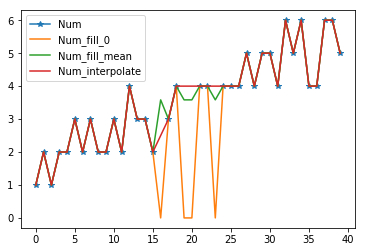

In [13]:
df_log.Num.plot(marker='*')
df_log.Num_fill_0.plot()
df_log.Num_fill_mean.plot()
df_log.Num_interpolate.plot()
plt.legend();

In [14]:
# method='quadratic'で2次の補間
df_log['Num_interpolate2'] = df_log.Num.interpolate(method='quadratic')
df_log[15:22]

,Date,Num,Product,Num_fill_0,Num_fill_mean,Num_interpolate,Num_interpolate2
15,2017-02-05,2.0,A,2.0,2.000000,2.0,2.000000
16,2017-02-08,NaN,A,0.0,3.583333,2.5,2.074065
17,2017-02-12,3.0,B,3.0,3.000000,3.0,3.000000
18,2017-02-14,4.0,A,4.0,4.000000,4.0,4.000000
19,2017-02-16,NaN,A,0.0,3.583333,4.0,4.386099
20,2017-02-18,NaN,A,0.0,3.583333,4.0,4.157791
21,2017-02-20,4.0,B,4.0,4.000000,4.0,4.000000


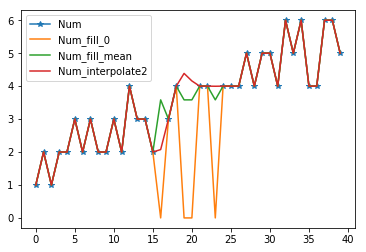

In [15]:
df_log.Num.plot(marker='*')
df_log.Num_fill_0.plot()
df_log.Num_fill_mean.plot()
df_log.Num_interpolate2.plot()
plt.legend();